In [1]:
! pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
print("NumPy Version:", np.__version__)

NumPy Version: 1.23.5


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Step 1: Load tickers from a CSV file
tickers_df = pd.read_csv('Tickers.csv')  # Ensure this file contains updated tickers
tickers = tickers_df['Ticker'].tolist()  # Adjust based on the column name in your CSV

In [6]:
tickers

['RELIANCE.NS',
 'TCS.NS',
 'INFY.BO',
 'HDFCBANK.BO',
 'ICICIBANK.BO',
 'ADANIPOWER.BO',
 'APOLLOHOSP.BO',
 'HEROMOTOCO.BO',
 'MARUTI.BO',
 'BHARTIARTL.NS']

In [7]:
from datetime import datetime, timedelta
# Get today's date as the end date
end_date = datetime.today().strftime('%Y-%m-%d')
# Calculate the start date (10 years before end date)
start_date = (datetime.today().replace(year=datetime.today().year - 10)).strftime('%Y-%m-%d')

In [8]:
print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2015-03-28
End Date: 2025-03-28


In [9]:
# Download historical data for each ticker without specifying date range
data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=False)
stock_data = data.stack(level=1).reset_index()
# Rename columns to make it more clear
stock_data.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [10]:
stock_data.head()

Date         Ticker         Open         High          Low  \
0 2015-03-30  ADANIPOWER.BO    47.500000    47.500000    47.700001   
1 2015-03-30  APOLLOHOSP.BO  1294.296143  1342.400024  1399.000000   
2 2015-03-30  BHARTIARTL.NS   333.333527   350.949585   354.103973   
3 2015-03-30    HDFCBANK.BO   461.863159   518.275024   519.700012   
4 2015-03-30  HEROMOTOCO.BO  1930.624512  2636.550049  2662.250000   

         Close    Adj Close     Volume  
0    46.299999    46.450001   542745.0  
1  1337.000000  1360.000000    10214.0  
2   340.314728   342.477753  5166621.0  
3   507.000000   512.000000   227918.0  
4  2564.350098  2580.000000    22425.0

In [11]:
stock_data['Ticker'].value_counts()

BHARTIARTL.NS    2469
RELIANCE.NS      2469
TCS.NS           2469
HDFCBANK.BO      2446
INFY.BO          2446
MARUTI.BO        2444
ADANIPOWER.BO    2443
APOLLOHOSP.BO    2443
HEROMOTOCO.BO    2443
ICICIBANK.BO     2443
Name: Ticker, dtype: int64

In [12]:
stock_data.tail()

Date        Ticker          Open          High           Low  \
24510 2025-03-27  ICICIBANK.BO   1336.750000   1336.750000   1351.000000   
24511 2025-03-27       INFY.BO   1603.550049   1603.550049   1620.000000   
24512 2025-03-27     MARUTI.BO  11721.650391  11721.650391  11824.700195   
24513 2025-03-27   RELIANCE.NS   1278.199951   1278.199951   1285.000000   
24514 2025-03-27        TCS.NS   3651.199951   3651.199951   3663.000000   

              Close     Adj Close      Volume  
24510   1332.199951   1332.199951     61933.0  
24511   1586.400024   1595.599976    158837.0  
24512  11640.049805  11740.049805     36575.0  
24513   1271.300049   1278.150024  15028056.0  
24514   3610.500000   3614.850098   2528474.0

In [13]:
s_data = stock_data.copy()

In [14]:
# View dimensions of dataset   
rows, col = stock_data.shape
print ("Dimensions of dataset: {}" . format (stock_data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (24515, 8)
Rows: 24515 
Columns: 8


In [15]:
# Dtype
print(f'The data type contains:\n object --> {stock_data.dtypes.value_counts()[1]}\n float64 --> {stock_data.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [16]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24515 entries, 0 to 24514
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       24515 non-null  datetime64[ns]
 1   Ticker     24515 non-null  object        
 2   Open       24515 non-null  float64       
 3   High       24515 non-null  float64       
 4   Low        24515 non-null  float64       
 5   Close      24515 non-null  float64       
 6   Adj Close  24515 non-null  float64       
 7   Volume     24515 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.5+ MB


In [17]:
float_cols = stock_data.columns.drop(["Ticker","Date"])
stock_data[float_cols] = stock_data[float_cols].round().astype("Int64")
stock_data.head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0 2015-03-30  ADANIPOWER.BO    48    48    48     46         46   542745
1 2015-03-30  APOLLOHOSP.BO  1294  1342  1399   1337       1360    10214
2 2015-03-30  BHARTIARTL.NS   333   351   354    340        342  5166621
3 2015-03-30    HDFCBANK.BO   462   518   520    507        512   227918
4 2015-03-30  HEROMOTOCO.BO  1931  2637  2662   2564       2580    22425

In [18]:
stock_data.sort_values(by="Date").head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0 2015-03-30  ADANIPOWER.BO    48    48    48     46         46   542745
1 2015-03-30  APOLLOHOSP.BO  1294  1342  1399   1337       1360    10214
2 2015-03-30  BHARTIARTL.NS   333   351   354    340        342  5166621
3 2015-03-30    HDFCBANK.BO   462   518   520    507        512   227918
4 2015-03-30  HEROMOTOCO.BO  1931  2637  2662   2564       2580    22425

In [19]:
stock_data1 = stock_data[(stock_data['Ticker'] == 'RELIANCE.NS')]    
stock_data1.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
8  2015-03-30  RELIANCE.NS   168   185  187    182        187  17330588
18 2015-03-31  RELIANCE.NS   172   189  190    187        187  20235395
28 2015-04-01  RELIANCE.NS   174   191  192    186        189  14588531
38 2015-04-06  RELIANCE.NS   171   189  192    188        191  12334096
48 2015-04-07  RELIANCE.NS   173   190  191    189        189  21275454

In [20]:
# View dimensions of dataset   
rows, col = stock_data1.shape
print ("Dimensions of dataset: {}" . format (stock_data1.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2469, 8)
Rows: 2469 
Columns: 8


In [21]:
# Dtype
print(f'The data type contains:\n object --> {stock_data1.dtypes.value_counts()[1]}\n float64 --> {stock_data1.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [22]:
stock_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 8 to 24513
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2469 non-null   datetime64[ns]
 1   Ticker     2469 non-null   object        
 2   Open       2469 non-null   Int64         
 3   High       2469 non-null   Int64         
 4   Low        2469 non-null   Int64         
 5   Close      2469 non-null   Int64         
 6   Adj Close  2469 non-null   Int64         
 7   Volume     2469 non-null   Int64         
dtypes: Int64(6), datetime64[ns](1), object(1)
memory usage: 188.1+ KB


In [23]:
stock_data2 = stock_data1.copy()

In [24]:
# Dtype
print(f'The data type contains:\n object --> {stock_data2.dtypes.value_counts()[1]}\n int64 --> {stock_data2.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 int64 --> 6


In [25]:
stock_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 8 to 24513
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2469 non-null   datetime64[ns]
 1   Ticker     2469 non-null   object        
 2   Open       2469 non-null   Int64         
 3   High       2469 non-null   Int64         
 4   Low        2469 non-null   Int64         
 5   Close      2469 non-null   Int64         
 6   Adj Close  2469 non-null   Int64         
 7   Volume     2469 non-null   Int64         
dtypes: Int64(6), datetime64[ns](1), object(1)
memory usage: 188.1+ KB


In [26]:
stock_data2.sort_values(by="Date").head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
8  2015-03-30  RELIANCE.NS   168   185  187    182        187  17330588
18 2015-03-31  RELIANCE.NS   172   189  190    187        187  20235395
28 2015-04-01  RELIANCE.NS   174   191  192    186        189  14588531
38 2015-04-06  RELIANCE.NS   171   189  192    188        191  12334096
48 2015-04-07  RELIANCE.NS   173   190  191    189        189  21275454

In [27]:
# Plotting count plot by year
Year = stock_data2['Date'].dt.year

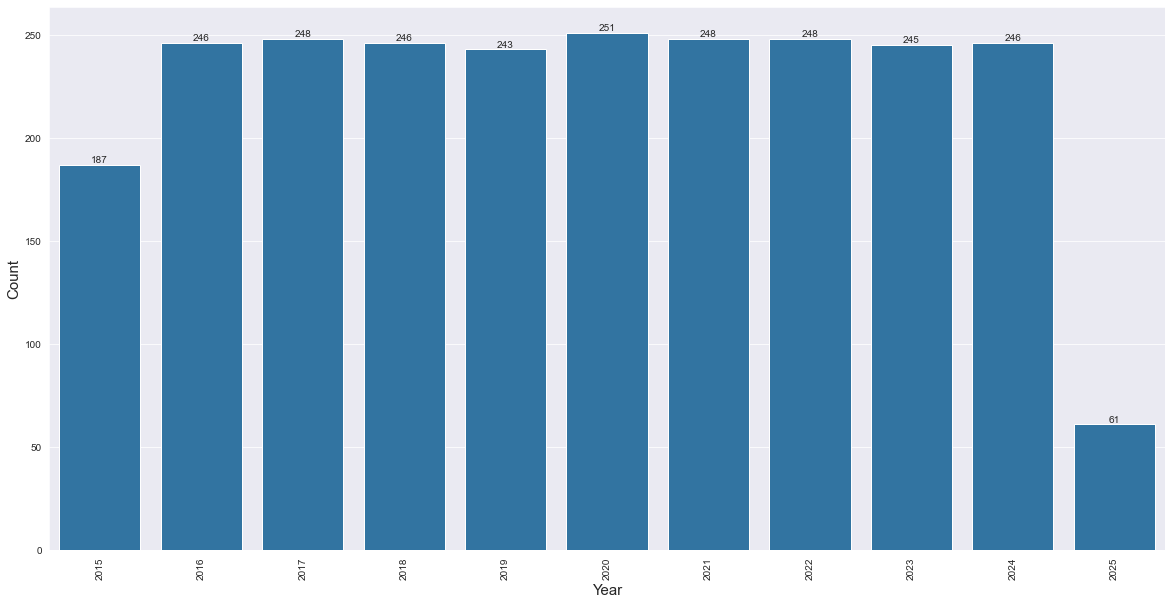

In [28]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data2, x=Year)
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

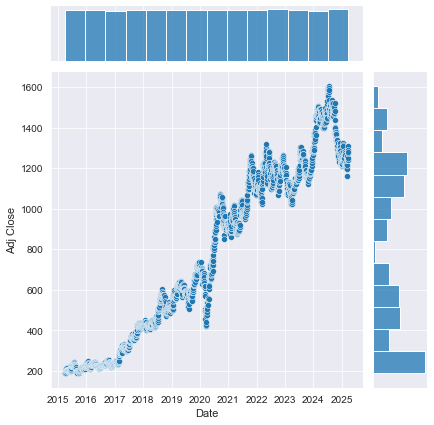

In [29]:
# Target-Date
sns.jointplot(data=stock_data2, x="Date", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Date", fontsize=11)
plt.show()

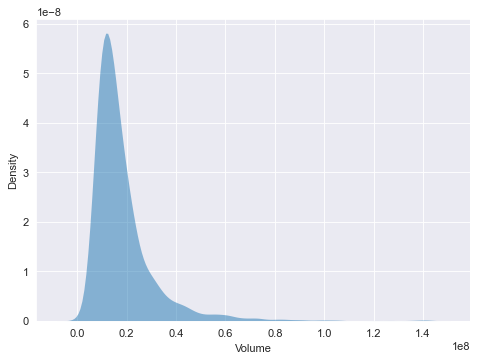

In [30]:
# The data distribution in "Volume"
plt.figure(figsize=(7,5), dpi=80)
sns.kdeplot(data=stock_data2, x="Volume", fill=True, common_norm=False,
            palette="crest", alpha=.5, linewidth=0)
plt.show()

In [31]:
# Assessing the 0 values of the "Volume" column
len(stock_data2[stock_data2["Volume"]==0])

1

In [32]:
stock_data3 = stock_data2[stock_data2["Volume"] != 0]

In [33]:
stock_data3.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
8  2015-03-30  RELIANCE.NS   168   185  187    182        187  17330588
18 2015-03-31  RELIANCE.NS   172   189  190    187        187  20235395
28 2015-04-01  RELIANCE.NS   174   191  192    186        189  14588531
38 2015-04-06  RELIANCE.NS   171   189  192    188        191  12334096
48 2015-04-07  RELIANCE.NS   173   190  191    189        189  21275454

In [34]:
# Assessing the 0 values of the "Volume" column
len(stock_data3[stock_data3["Volume"]==0])

0

In [35]:
# Plotting count plot by year
Year1 = stock_data['Date'].dt.year

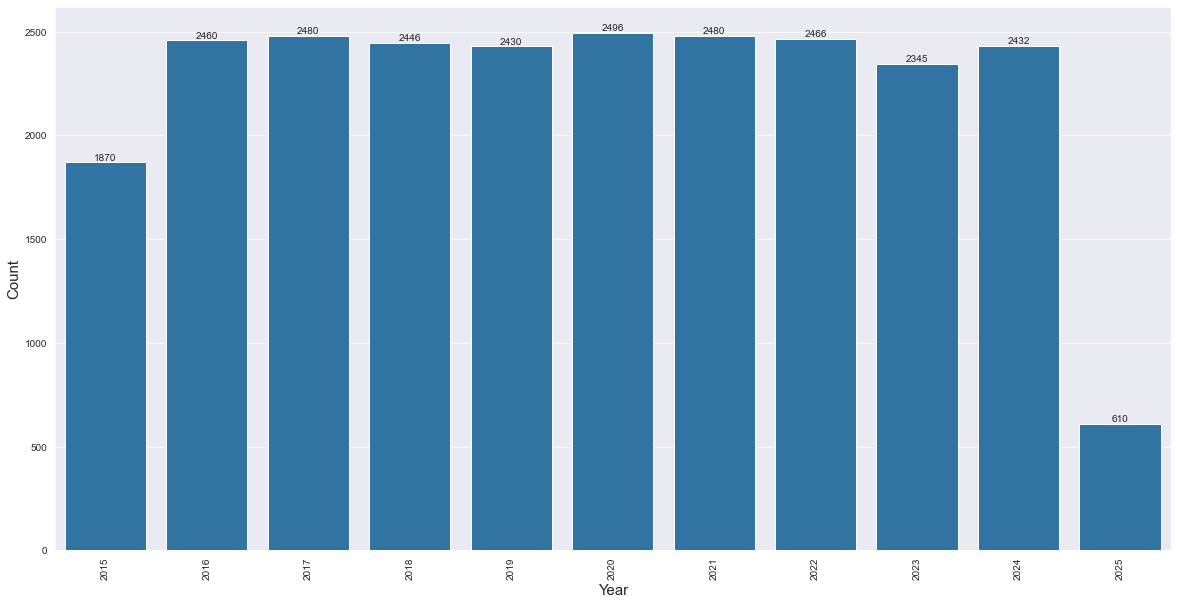

In [36]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data, x=Year1)
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

In [37]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The min value of ",i," is ",stock_data[i].min())

The min value of  Open  is  15
The min value of  High  is  15
The min value of  Low  is  16
The min value of  Close  is  15
The min value of  Adj Close  is  16
The min value of  Volume  is  0


In [38]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The max value of ",i," is ",stock_data[i].max())

The max value of  Open  is  13497
The max value of  High  is  13497
The max value of  Low  is  13675
The max value of  Close  is  13275
The max value of  Adj Close  is  13410
The max value of  Volume  is  326148900


In [39]:
column=stock_data['Ticker']
column
# Check for problematic values in the 'Close' column
print(stock_data['Close'].value_counts())

30       117
27        91
29        86
28        80
36        65
        ... 
3153       1
7639       1
2699       1
2706       1
11640      1
Name: Close, Length: 6097, dtype: Int64


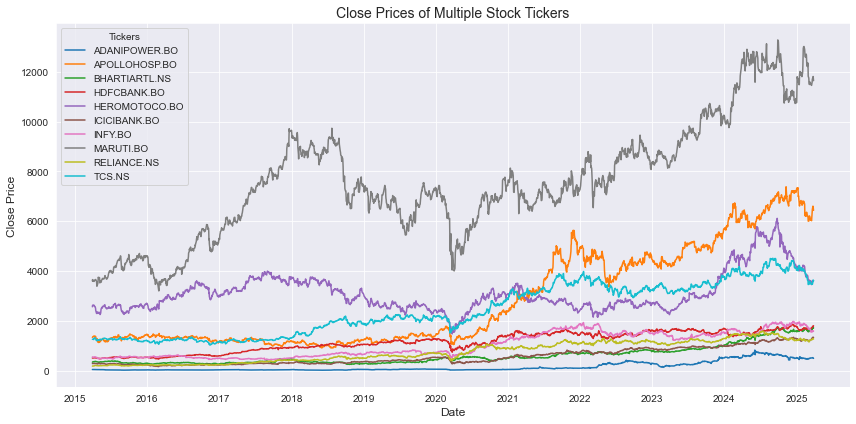

In [40]:
# Pivot data for plotting
pivot_df = stock_data.pivot(index='Date', columns='Ticker', values='Close')
# Convert the Int datatype to Float datatype
pivot_df = pivot_df.astype(float)
# Fill NaN values in pivot_df with an appropriate method
pivot_df = pivot_df.ffill()  # Forward fill
# OR
pivot_df = pivot_df.fillna(0)  # Replace NaN with 0 (if valid)
# Plotting
plt.figure(figsize=(12, 6))
for ticker in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[ticker], label=ticker)

plt.title('Close Prices of Multiple Stock Tickers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title='Tickers', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# Replace close prices in the range 0-100 with NaN
col=stock_data.columns.drop(['Ticker','Date'])
for val in col:
    stock_data.loc[(stock_data[val] > 0) & (stock_data[val] <= 100), val] = np.nan

In [42]:
columns_no_varience = []
for col in stock_data.columns:
    if len(stock_data[col].unique()) ==1:
        columns_no_varience.append(col)
        stock_data.drop([col], axis = 1, inplace = True)
print(columns_no_varience)
print (stock_data.shape)

[]
(24515, 8)


In [43]:
duplicate_rows = stock_data.duplicated()
print(duplicate_rows.any())
stock_data.drop_duplicates(inplace = True)
print(stock_data.shape)

False
(24515, 8)


In [44]:
## Checking For Duplicated Rows in Data
stock_data.duplicated().sum()

0

In [45]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'before outlier treatment: ', stock_data[column].skew())

Skewness of Open before outlier treatment:  2.1120287943636447
Skewness of High before outlier treatment:  1.991144847117949
Skewness of Close before outlier treatment:  1.9933124567572784
Skewness of Low before outlier treatment:  1.9881877169800355
Skewness of Adj Close before outlier treatment:  1.9913473929363574


In [46]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Maximum value in', column, 'before outlier treatment: ', stock_data[column].max())

Maximum value in Open before outlier treatment:  13497
Maximum value in High before outlier treatment:  13497
Maximum value in Close before outlier treatment:  13275
Maximum value in Low before outlier treatment:  13675
Maximum value in Adj Close before outlier treatment:  13410


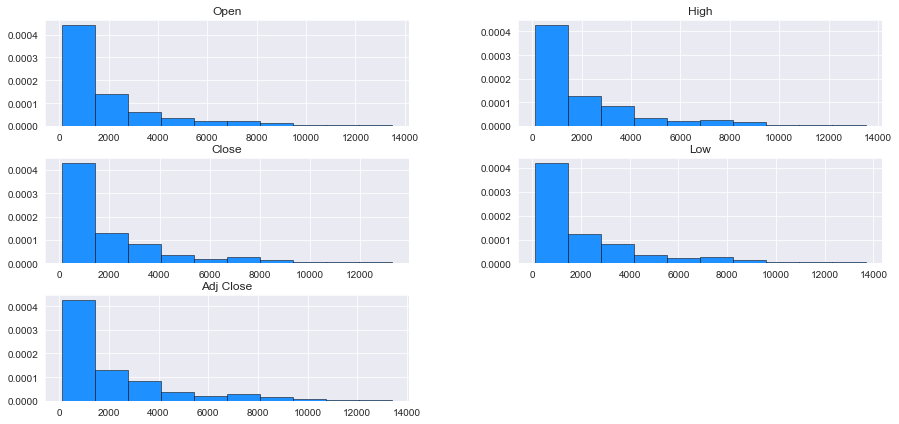

In [47]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

In [48]:
stock_data.isnull().sum()

Date            0
Ticker          0
Open         1575
High         1575
Low          1548
Close        1598
Adj Close    1569
Volume          0
dtype: int64

In [49]:
print('Percentage of Missing values:')
print('-----------------------------')
stock_data.isnull().sum()/len(stock_data)*100

Percentage of Missing values:
-----------------------------


Date         0.000000
Ticker       0.000000
Open         6.424638
High         6.424638
Low          6.314501
Close        6.518458
Adj Close    6.400163
Volume       0.000000
dtype: float64

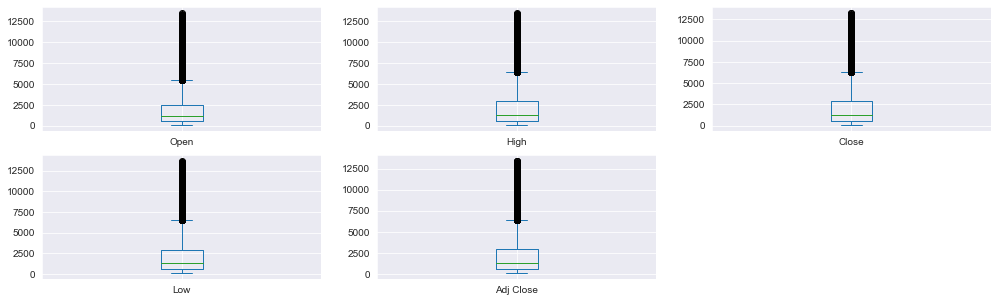

In [50]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

In [51]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    Q1 = stock_data[column].quantile(0.25)
    Q3 = stock_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Drop NaN values before comparison
    column_data = stock_data[column].dropna()
    outliers = [x for x in column_data if x < lower or x > upper]

    print(column)
    print('Identified outliers: %d' % len(outliers))
    print('*' * 40)

Open
Identified outliers: 2313
****************************************
High
Identified outliers: 1946
****************************************
Close
Identified outliers: 1935
****************************************
Low
Identified outliers: 1944
****************************************
Adj Close
Identified outliers: 1942
****************************************


In [52]:
stock_data['Open'].isna().sum()

1575

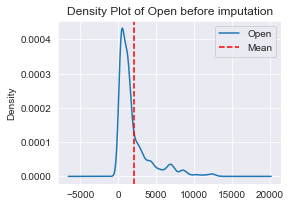

In [53]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [54]:
Skewness_of_Open_with_missing_values = stock_data['Open'].skew()
Skewness_of_Open_with_missing_values

2.1120287943636447

In [55]:
stock_data['Open']=stock_data.groupby(['Date'], group_keys=False)['Open'].apply(lambda x:x.fillna(x.median()))
stock_data['Open'].isna().sum()

0

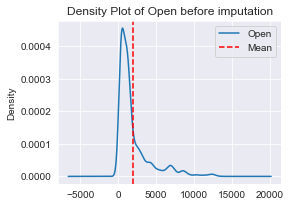

In [56]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [57]:
stock_data['Close'].isna().sum()

1598

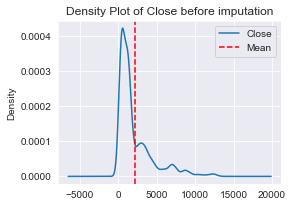

In [58]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close before imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [59]:
Skewness_of_Open_with_missing_values = stock_data['Close'].skew()
Skewness_of_Open_with_missing_values

1.9933124567572784

In [60]:
stock_data['Close']=stock_data.groupby(['Date'], group_keys=False)['Close'].apply(lambda x:x.fillna(x.median()))
stock_data['Close'].isna().sum()

0

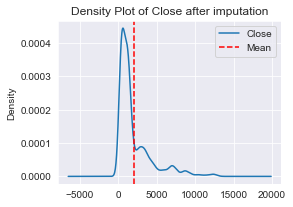

In [61]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close after imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [62]:
stock_data['Low'].isna().sum()

1548

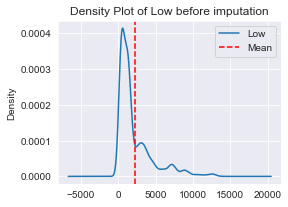

In [63]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low before imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [64]:
Skewness_of_Open_with_missing_values = stock_data['Low'].skew()
Skewness_of_Open_with_missing_values

1.9881877169800355

In [65]:
stock_data['Low']=stock_data.groupby(['Date'], group_keys=False)['Low'].apply(lambda x:x.fillna(x.median()))
stock_data['Low'].isna().sum()

0

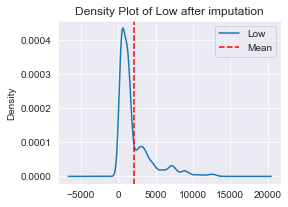

In [66]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low after imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [67]:
stock_data['High'].isna().sum()

1575

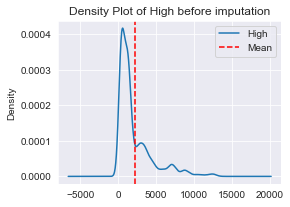

In [68]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [69]:
Skewness_of_Open_with_missing_values = stock_data['High'].skew()
Skewness_of_Open_with_missing_values

1.991144847117949

In [70]:
stock_data['High']=stock_data.groupby(['Date'], group_keys=False)['High'].apply(lambda x:x.fillna(x.median()))
stock_data['High'].isna().sum()

0

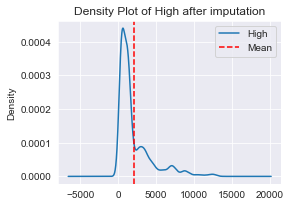

In [71]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High after imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [72]:
stock_data['Adj Close'].isna().sum()

1569

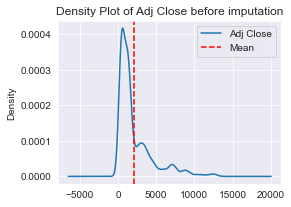

In [73]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [74]:
Skewness_of_Open_with_missing_values = stock_data['Adj Close'].skew()
Skewness_of_Open_with_missing_values

1.9913473929363574

In [75]:
stock_data['Adj Close']=stock_data.groupby(['Date'], group_keys=False)['Adj Close'].apply(lambda x:x.fillna(x.median()))
stock_data['Adj Close'].isna().sum()

0

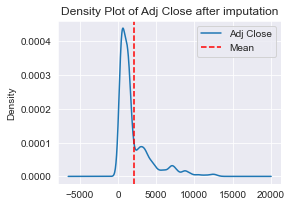

In [76]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close after imputation')
plt.axvline(x=stock_data['Adj Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

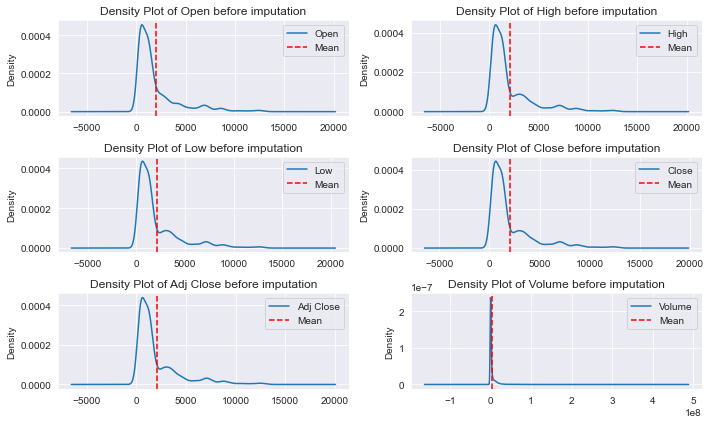

In [77]:
# Exclude unwanted columns
col = stock_data.columns.drop(['Ticker', 'Date'])

# Number of plots per row
plots_per_row = 2

# Initialize subplots
fig, axes = plt.subplots(nrows=(len(col) + 1) // plots_per_row, ncols=plots_per_row, figsize=(10, 6))
axes = axes.flatten()  # Flatten axes array for easy iteration

for idx, i in enumerate(col):
    stock_data[i].plot(kind='density', ax=axes[idx], figsize=(10, 6))
    axes[idx].set_title(f'Density Plot of {i} before imputation')
    axes[idx].axvline(x=stock_data[i].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].legend()

# Hide unused axes (if any)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [78]:
# Pivot data for plotting
pivot_df1 = stock_data.pivot(index='Date', columns='Ticker', values='Close')
pivot_df1.dtypes

Ticker
ADANIPOWER.BO    Int64
APOLLOHOSP.BO    Int64
BHARTIARTL.NS    Int64
HDFCBANK.BO      Int64
HEROMOTOCO.BO    Int64
ICICIBANK.BO     Int64
INFY.BO          Int64
MARUTI.BO        Int64
RELIANCE.NS      Int64
TCS.NS           Int64
dtype: object

In [79]:
pivot_df1 = pivot_df1.astype(float)
pivot_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2015-03-30 to 2025-03-27
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ADANIPOWER.BO  2443 non-null   float64
 1   APOLLOHOSP.BO  2443 non-null   float64
 2   BHARTIARTL.NS  2469 non-null   float64
 3   HDFCBANK.BO    2446 non-null   float64
 4   HEROMOTOCO.BO  2443 non-null   float64
 5   ICICIBANK.BO   2443 non-null   float64
 6   INFY.BO        2446 non-null   float64
 7   MARUTI.BO      2444 non-null   float64
 8   RELIANCE.NS    2469 non-null   float64
 9   TCS.NS         2469 non-null   float64
dtypes: float64(10)
memory usage: 212.2 KB


In [80]:
pivot_df1.isnull().sum()

Ticker
ADANIPOWER.BO    26
APOLLOHOSP.BO    26
BHARTIARTL.NS     0
HDFCBANK.BO      23
HEROMOTOCO.BO    26
ICICIBANK.BO     26
INFY.BO          23
MARUTI.BO        25
RELIANCE.NS       0
TCS.NS            0
dtype: int64

In [81]:
# Fill NaN values in pivot_df1 (choose one approach based on the scenario)
pivot_df1 = pivot_df1.ffill()  # Forward fill missing values
# OR
#pivot_df1 = pivot_df1.fillna(0)  # Replace NaN with 0 if appropriate

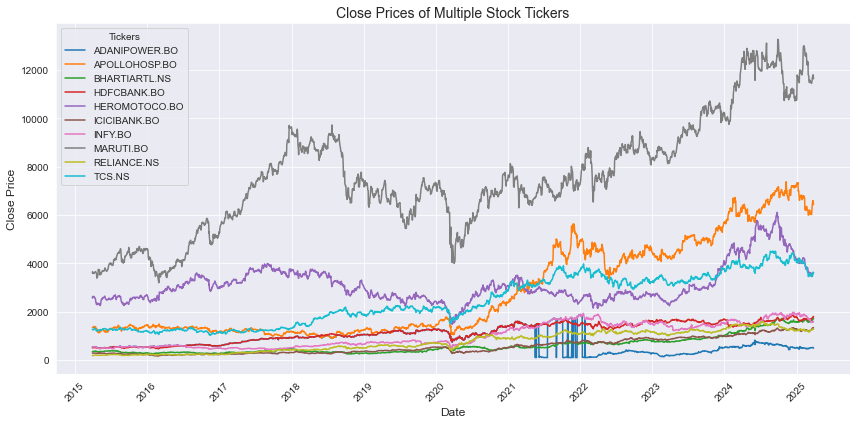

In [82]:
# Plotting
plt.figure(figsize=(12, 6))

for ticker in pivot_df1.columns:
    plt.plot(pivot_df1.index, pivot_df1[ticker], label=ticker)

plt.title('Close Prices of Multiple Stock Tickers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title='Tickers', fontsize=10, loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

In [83]:
stock_data.loc[(stock_data['Ticker'] == 'ADANIPOWER.BO') , 'Ticker'] = np.nan

In [84]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker               2443
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [85]:
stock_data = stock_data.dropna(subset=['Ticker'])

In [86]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker                  0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [87]:
stock_data['Ticker'].value_counts()

BHARTIARTL.NS    2469
RELIANCE.NS      2469
TCS.NS           2469
HDFCBANK.BO      2446
INFY.BO          2446
MARUTI.BO        2444
APOLLOHOSP.BO    2443
HEROMOTOCO.BO    2443
ICICIBANK.BO     2443
Name: Ticker, dtype: int64

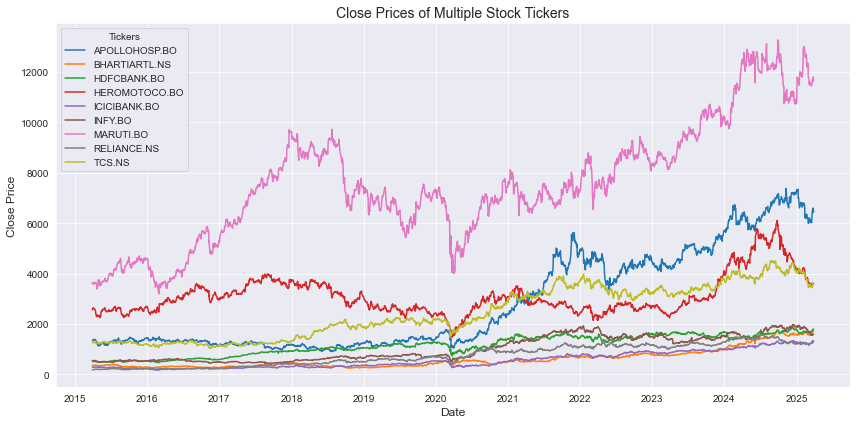

In [88]:
# Pivot data for plotting
pivot_df2 = stock_data.pivot(index='Date', columns='Ticker', values='Close')
# Ensure pivot_df has no NaN values
pivot_df2 = pivot_df2.fillna(method='ffill')  # Forward fill
# OR
# pivot_df = pivot_df.fillna(0)  # Replace NaN with 0

# Ensure data type is float
pivot_df2 = pivot_df2.astype(float)

# Plotting
plt.figure(figsize=(12, 6))
for ticker in pivot_df2.columns:
    plt.plot(pivot_df2.index, pivot_df2[ticker], label=ticker)

plt.title('Close Prices of Multiple Stock Tickers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title='Tickers', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
# Numerical columns to check for outliers
stock_data_numerical_columns = stock_data.columns.drop(['Ticker', 'Date'])

# Remove outliers using the IQR method
for column in stock_data_numerical_columns:
    Q1 = stock_data[column].quantile(0.25)  # First quartile
    Q3 = stock_data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                           # Interquartile Range

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    stock_data = stock_data[(stock_data[column] >= lower_bound) & (stock_data[column] <= upper_bound)]

# Display the updated dataset
print("Outliers removed. Dataset shape:", stock_data.shape)


Outliers removed. Dataset shape: (14350, 8)


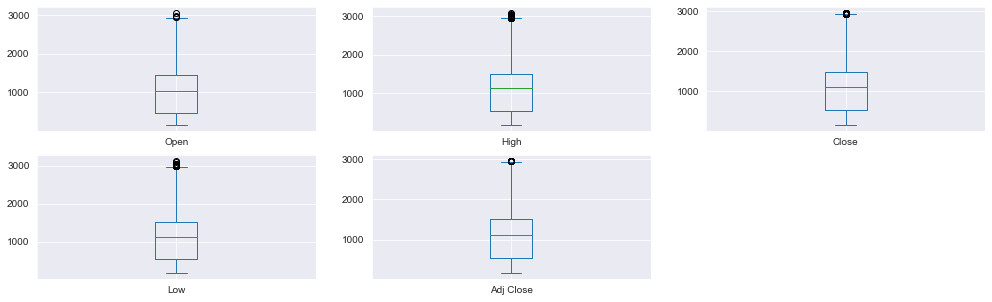

In [90]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

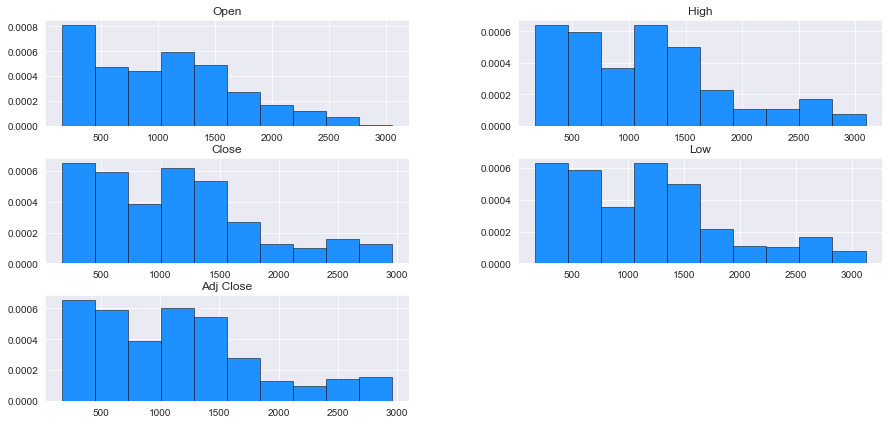

In [91]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

<AxesSubplot:>

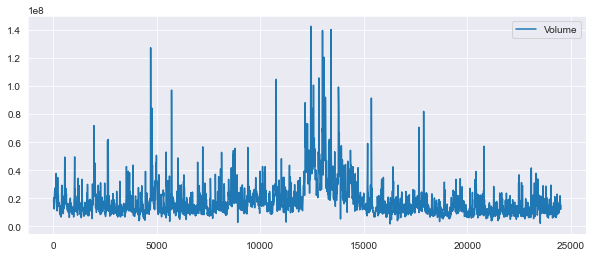

In [92]:
# Now let's plot the total volume of stock being traded each day over the past year
stock_data3['Volume'].plot(legend=True, figsize=(10,4))

In [93]:
# Assessing the 0 values of the "Volume" column
len(stock_data3[stock_data3["Volume"]==0])

0

In [94]:
stock_data.describe()

Open         High         Low       Close    Adj Close  \
count      14350.0      14350.0     14350.0     14350.0      14350.0   
mean   1055.345226  1145.234704  1158.46885  1132.65115  1146.002648   
std     618.845344   696.955662  705.541329  688.921346   697.259324   
min          156.0        167.0       169.0       164.0        168.0   
25%          473.0        541.0       546.0       536.0        542.0   
50%         1030.0       1119.0      1131.0      1104.0       1120.0   
75%         1454.0       1504.0      1518.0      1490.0       1503.0   
max         3059.0       3091.0      3125.0      2960.0       2960.0   

               Volume  
count         14350.0  
mean   1918557.574983  
std    2887286.414736  
min               0.0  
25%         122487.75  
50%          450975.0  
75%        2501358.25  
max        12097338.0

In [95]:
stock_data.corr()   

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.987282  0.986925  0.987199   0.986702 -0.246075
High       0.987282  1.000000  0.999797  0.999784   0.999534 -0.260938
Low        0.986925  0.999797  1.000000  0.999646   0.999737 -0.260811
Close      0.987199  0.999784  0.999646  1.000000   0.999752 -0.261001
Adj Close  0.986702  0.999534  0.999737  0.999752   1.000000 -0.260995
Volume    -0.246075 -0.260938 -0.260811 -0.261001  -0.260995  1.000000

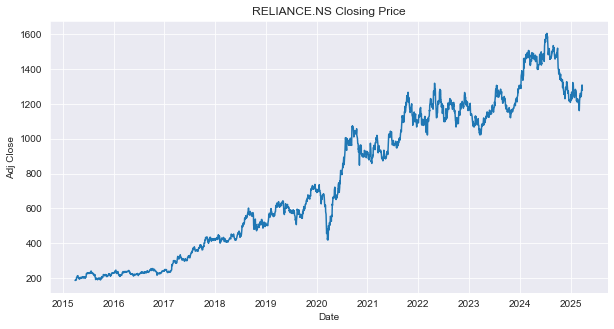

In [96]:
# plot lineplot
stock = 'RELIANCE.NS'
plt.figure(figsize = (10,5))
sns.lineplot(data = stock_data3,x='Date',y='Adj Close')
plt.title(f'{stock} Closing Price')
plt.show()

<AxesSubplot:>

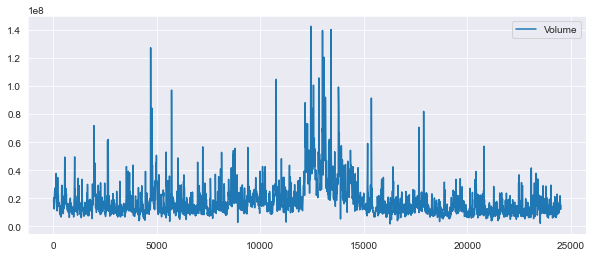

In [97]:
stock_data3['Volume'].plot(legend=True,figsize=(10,4))

In [98]:
Tech_list=stock_data["Ticker"].unique()
Tech_list

array(['APOLLOHOSP.BO', 'BHARTIARTL.NS', 'HDFCBANK.BO', 'HEROMOTOCO.BO',
       'ICICIBANK.BO', 'INFY.BO', 'TCS.NS', 'RELIANCE.NS'], dtype=object)

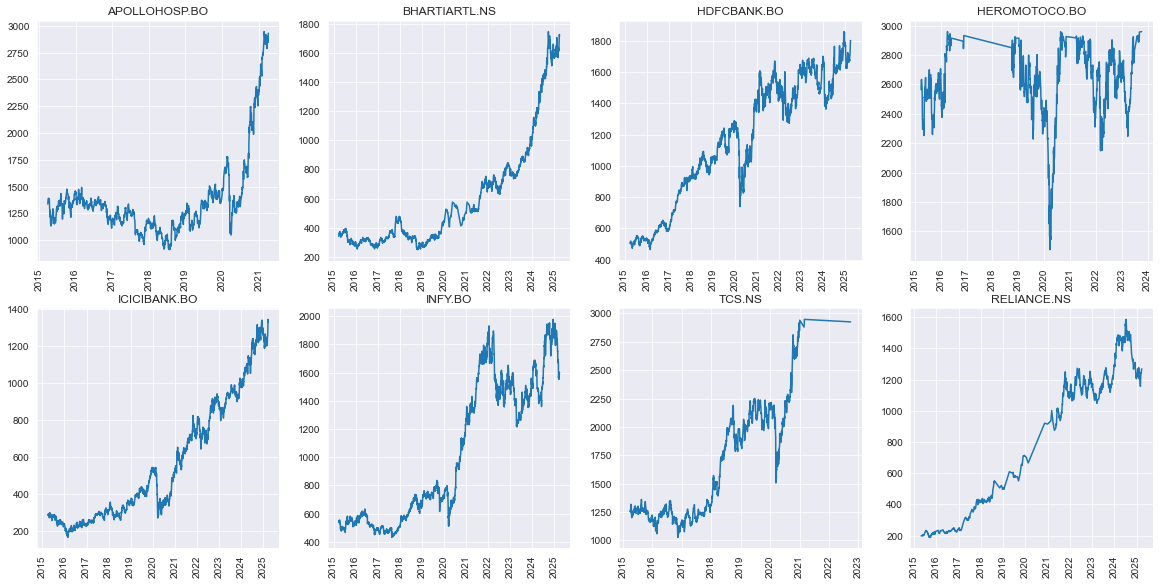

In [99]:
plt.figure(figsize=(20,15))
for i, company in enumerate(Tech_list,1):
    plt.subplot(3,4,i)
    plt.title(company)
    df=stock_data[stock_data["Ticker"]== company]
    plt.plot(df["Date"], df["Close"])
    plt.xticks(rotation="vertical")

In [100]:
import plotly.express as px
for comapny in Tech_list:
    df= stock_data[stock_data["Ticker"]== company]
    plot=px.line(df,x="Date",y= "Volume",title=comapny)
    plot.show()

In [101]:
stock_data3.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
8  2015-03-30  RELIANCE.NS   168   185  187    182        187  17330588
18 2015-03-31  RELIANCE.NS   172   189  190    187        187  20235395
28 2015-04-01  RELIANCE.NS   174   191  192    186        189  14588531
38 2015-04-06  RELIANCE.NS   171   189  192    188        191  12334096
48 2015-04-07  RELIANCE.NS   173   190  191    189        189  21275454

In [102]:
col=['Open','Close','Low','High','Adj Close']
stock_data3[col] = stock_data3[col].astype(float)

In [103]:
stock_data3["Daily price change"]= stock_data3["Close"]-stock_data3["Open"]

In [104]:
stock_data3.head()

Date       Ticker   Open   High    Low  Close  Adj Close    Volume  \
8  2015-03-30  RELIANCE.NS  168.0  185.0  187.0  182.0      187.0  17330588   
18 2015-03-31  RELIANCE.NS  172.0  189.0  190.0  187.0      187.0  20235395   
28 2015-04-01  RELIANCE.NS  174.0  191.0  192.0  186.0      189.0  14588531   
38 2015-04-06  RELIANCE.NS  171.0  189.0  192.0  188.0      191.0  12334096   
48 2015-04-07  RELIANCE.NS  173.0  190.0  191.0  189.0      189.0  21275454   

    Daily price change  
8                 14.0  
18                15.0  
28                12.0  
38                17.0  
48                16.0

In [105]:
stock_data3["% daily price change"]= ((stock_data3["Daily price change"])/stock_data3["Close"])*100

In [106]:
stock_data3.head()

Date       Ticker   Open   High    Low  Close  Adj Close    Volume  \
8  2015-03-30  RELIANCE.NS  168.0  185.0  187.0  182.0      187.0  17330588   
18 2015-03-31  RELIANCE.NS  172.0  189.0  190.0  187.0      187.0  20235395   
28 2015-04-01  RELIANCE.NS  174.0  191.0  192.0  186.0      189.0  14588531   
38 2015-04-06  RELIANCE.NS  171.0  189.0  192.0  188.0      191.0  12334096   
48 2015-04-07  RELIANCE.NS  173.0  190.0  191.0  189.0      189.0  21275454   

    Daily price change  % daily price change  
8                 14.0              7.692308  
18                15.0              8.021390  
28                12.0              6.451613  
38                17.0              9.042553  
48                16.0              8.465608

In [107]:
plot=px.line(stock_data3, x="Date", y="% daily price change", title= "RELIANCE.NS")
plot.show()

In [108]:
fig = px.line(stock_data3, x="Date", y="% daily price change", title='Daily price change in stock' ,template = 'plotly_dark')
fig.show()

In [109]:
stock_data3["Smoothed Change"] = stock_data3["% daily price change"].rolling(window=10).mean()

In [110]:
plot = px.line(stock_data3, x="Date", y="Smoothed Change", title="RELIANCE.NS - Smoothed Daily Price Change")
plot.show()

In [111]:
stock_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 8 to 24513
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2468 non-null   datetime64[ns]
 1   Ticker                2468 non-null   object        
 2   Open                  2468 non-null   float64       
 3   High                  2468 non-null   float64       
 4   Low                   2468 non-null   float64       
 5   Close                 2468 non-null   float64       
 6   Adj Close             2468 non-null   float64       
 7   Volume                2468 non-null   Int64         
 8   Daily price change    2468 non-null   float64       
 9   % daily price change  2468 non-null   float64       
 10  Smoothed Change       2459 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(8), object(1)
memory usage: 233.8+ KB


<AxesSubplot:xlabel='Date'>

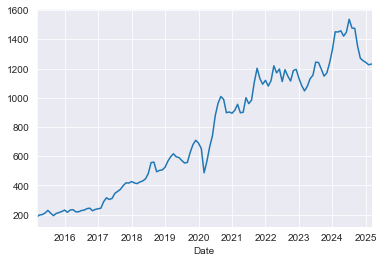

In [112]:
# Convert 'Date' column to datetime if it's not already in datetime format
stock_data3['Date'] = pd.to_datetime(stock_data3['Date'])

# Set 'Date' as the index
stock_data3.set_index('Date', inplace=True)

# Now you can resample by month and plot the mean of 'Close' prices
stock_data3['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

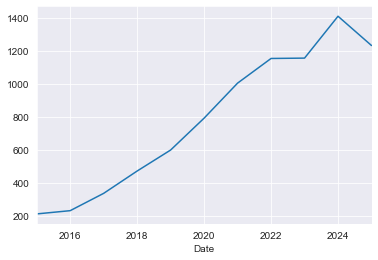

In [113]:
stock_data3['Close'].resample('Y').mean().plot()

In [114]:
# Pivot the dataset to get Close prices for each ticker
close_prices = s_data.pivot(columns='Ticker', values='Close')
# Reset the index to simple integers
close_prices.reset_index(drop=True, inplace=True)
# Assign index as 1, 2, 3...
close_prices.index = range(1, len(close_prices) + 1)

In [115]:
close_prices.head()

Ticker  ADANIPOWER.BO  APOLLOHOSP.BO  BHARTIARTL.NS  HDFCBANK.BO  \
1           46.299999            NaN            NaN          NaN   
2                 NaN         1337.0            NaN          NaN   
3                 NaN            NaN     340.314728          NaN   
4                 NaN            NaN            NaN        507.0   
5                 NaN            NaN            NaN          NaN   

Ticker  HEROMOTOCO.BO  ICICIBANK.BO  INFY.BO  MARUTI.BO  RELIANCE.NS  TCS.NS  
1                 NaN           NaN      NaN        NaN          NaN     NaN  
2                 NaN           NaN      NaN        NaN          NaN     NaN  
3                 NaN           NaN      NaN        NaN          NaN     NaN  
4                 NaN           NaN      NaN        NaN          NaN     NaN  
5         2564.350098           NaN      NaN        NaN          NaN     NaN

In [116]:
# Fill missing values using forward fill
close_prices.fillna(method='ffill', inplace=True)
# Optionally, use backward fill
close_prices.fillna(method='bfill', inplace=True)

In [117]:
close_prices.head()

Ticker  ADANIPOWER.BO  APOLLOHOSP.BO  BHARTIARTL.NS  HDFCBANK.BO  \
1           46.299999         1337.0     340.314728        507.0   
2           46.299999         1337.0     340.314728        507.0   
3           46.299999         1337.0     340.314728        507.0   
4           46.299999         1337.0     340.314728        507.0   
5           46.299999         1337.0     340.314728        507.0   

Ticker  HEROMOTOCO.BO  ICICIBANK.BO     INFY.BO    MARUTI.BO  RELIANCE.NS  \
1         2564.350098         285.0  548.862488  3601.449951   182.055069   
2         2564.350098         285.0  548.862488  3601.449951   182.055069   
3         2564.350098         285.0  548.862488  3601.449951   182.055069   
4         2564.350098         285.0  548.862488  3601.449951   182.055069   
5         2564.350098         285.0  548.862488  3601.449951   182.055069   

Ticker  TCS.NS  
1       1260.0  
2       1260.0  
3       1260.0  
4       1260.0  
5       1260.0

In [118]:
close_prices.isnull().sum()

Ticker
ADANIPOWER.BO    0
APOLLOHOSP.BO    0
BHARTIARTL.NS    0
HDFCBANK.BO      0
HEROMOTOCO.BO    0
ICICIBANK.BO     0
INFY.BO          0
MARUTI.BO        0
RELIANCE.NS      0
TCS.NS           0
dtype: int64

In [ ]:
sns.pairplot(data=close_prices)

In [ ]:
sns.heatmap(close_prices.corr(),annot=True,cmap='gray_r',linecolor="black")

In [ ]:
plt.figure(figsize=(10,10))
stock_data3['Close'].resample("Y").mean().plot(kind="bar")
plt.xticks(rotation="vertical")

In [ ]:
# Let's see a historical view of the closing price
stock_data3['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
stock_data3['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

In [ ]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    stock_data3[column_name]=pd.DataFrame.rolling(stock_data3['Close'],ma).mean()

In [ ]:
stock_data3[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

In [ ]:
# use pct_change to find the percent change for each day
stock_data3['Daily price change'] =  stock_data3['Close'].pct_change()
# plot the daily return percentage
stock_data3['Daily price change'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

In [ ]:
s_data.info()

In [ ]:
# Step 2: Recalculate the Daily Return
s_data['Daily_Return'] = ((s_data['Close'] - s_data['Open']) / s_data['Close']) * 100

In [ ]:
# Pivot the dataset to organize by Ticker
daily_returns = s_data.pivot(index='Date', columns='Ticker', values='Daily_Return')

# Reset the index to integers if required
daily_returns.reset_index(drop=True, inplace=True)
daily_returns.index = range(1, len(daily_returns) + 1)
daily_returns.head() 

In [ ]:
daily_returns = daily_returns.drop(columns=["ADANIPOWER.BO"])
daily_returns.head() 

In [ ]:
sns.pairplot(data=daily_returns)

In [ ]:
sns.heatmap(daily_returns.corr(),annot=True,cmap='gray_r',linecolor="black")

In [ ]:
stock_data3.head()

In [ ]:
stock_data3.isnull().sum()

In [ ]:
# Fill missing values using forward fill
stock_data3.fillna(method='ffill', inplace=True)
# Optionally, use backward fill
stock_data3.fillna(method='bfill', inplace=True)

In [ ]:
stock_data3.isnull().sum()

In [ ]:
stock_data3.head()

In [ ]:
stock_data3.columns

In [ ]:
stock_data3["EMA_10"] = stock_data3["Close"].ewm(span=10, adjust=False).mean()  # Short-term trend
stock_data3["EMA_50"] = stock_data3["Close"].ewm(span=50, adjust=False).mean()  # Medium-term trend
stock_data3["EMA_200"] = stock_data3["Close"].ewm(span=200, adjust=False).mean()  # Long-term trend

In [ ]:
stock_data3.head()

In [ ]:
stock_data["EMA_10"] = stock_data["Close"].ewm(span=10, adjust=False).mean()  # Short-term trend
stock_data["EMA_50"] = stock_data["Close"].ewm(span=50, adjust=False).mean()  # Medium-term trend
stock_data["EMA_200"] = stock_data["Close"].ewm(span=200, adjust=False).mean()  # Long-term trend

In [ ]:
stock_data.head()

In [ ]:
col=['Open','Close','High','Low','Adj Close']
stock_data[col]=stock_data[col].astype(float)

In [ ]:
stock_data.head()

In [ ]:
stock_data["Daily price change"]= stock_data["Close"]-stock_data["Open"]

In [ ]:
stock_data.head()

In [ ]:
stock_data["% daily price change"]= ((stock_data["Daily price change"])/stock_data["Close"])*100

In [ ]:
stock_data.head()

In [ ]:
# Fetch stock data for each ticker and store it in a dictionary
all_stock_data = {}

for ticker in tickers:
    all_stock_data[ticker] = stock_data  # Store in dictionary

# Define the subplot grid (2 rows, 4 columns)
nrows, ncols = 2, 5  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))  # Set figure size

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each ticker's daily price change on its respective subplot
for i, ticker in enumerate(tickers):
    axes[i].plot(all_stock_data[ticker].index, all_stock_data[ticker]["% daily price change"], color="blue", alpha=0.6)
    axes[i].set_title(ticker)  # Set title as the ticker name
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_ylabel("% Daily Price Change")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
stock_data["Smoothed Change"] = stock_data["% daily price change"].rolling(window=10).mean()  # Apply smoothing
stock_data.dropna(inplace=True)  # Remove NaN values

In [ ]:
# Fetch stock data for each ticker and store it in a dictionary
all_stock_data = {}

for ticker in tickers:
    all_stock_data[ticker] = stock_data  # Store in dictionary

# Define the subplot grid (2 rows, 4 columns)
nrows, ncols = 2, 5  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))  # Set figure size

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each ticker's daily price change on its respective subplot
for i, ticker in enumerate(tickers):
    axes[i].plot(all_stock_data[ticker].index, all_stock_data[ticker]["Smoothed Change"], color="blue", alpha=0.6)
    axes[i].set_title(ticker)  # Set title as the ticker name
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_ylabel("Smoothed Change")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Convert 'Date' column to datetime if it's not already in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

In [ ]:
# use pct_change to find the percent change for each day
stock_data['Daily price change'] =  stock_data['Close'].pct_change()

In [ ]:
stock_data.head()

In [ ]:
stock_data3.columns

In [ ]:
# Create target variable (Close Price after 365 days)
stock_data3["Close_365"] = stock_data3["Close"].shift(-365)

# Drop rows with NaN target values (since shifting creates NaNs)
stock_data3 = stock_data3.dropna()

In [ ]:
stock_data3.head()

In [ ]:
# Define features (X) and target variable (y)
features = stock_data3.drop(columns=["Close_365","Ticker","Volume","Close"])  # Drop the target variable
target = stock_data3["Close_365"]  # Target variable (Close price after 365 days)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates  # Corrected "mandates" to "mdates"
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense, LSTM  # Combined duplicate import of Dense & LSTM
import keras.backend as K  # Corrected import syntax
from keras.callbacks import EarlyStopping  # Corrected "Callbacks" to "callbacks"
from keras.optimizers import Adam  # Corrected "Optimisers" to "optimizers"
from keras.models import load_model  # Corrected "Models" to "models"
from keras.utils import plot_model  # Corrected "utils. vis_utils" spacing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

# Scale y
Scaler_y = MinMaxScaler()
y_train_scaled = Scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = Scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
# Convert DataFrame to NumPy array before reshaping
X_train_array = np.array(X_train_scaled)  # Convert DataFrame to NumPy
X_test_array = np.array(X_test_scaled)    # Convert DataFrame to NumPy

# Reshape for LSTM (3D input: [samples, timesteps, features])
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# Define sequence length (adjust as needed)
seq_length = 20  

# Build Improved LSTM Model
lstm_model = Sequential([
    LSTM(200, return_sequences=True, activation='tanh', input_shape=(seq_length, X_train_reshaped.shape[2])),
    BatchNormalization(),  # Normalize activations to prevent divergence
    Dropout(0.2),  # Prevent overfitting

    LSTM(128, return_sequences=True, activation='tanh'),
    BatchNormalization(),  # Normalize activations to prevent divergence
    Dropout(0.2),

    LSTM(64, return_sequences=False, activation='tanh'),
    BatchNormalization(),  # Normalize activations to prevent divergence
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile Model with Adam Optimizer & Learning Rate Scheduling
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss='mse')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train model
history = lstm_model.fit(
    X_train_reshaped, y_train_scaled, 
    epochs=100, batch_size=64,  # Increased batch size for stability
    validation_data=(X_test_reshaped, y_test_scaled),
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

In [ ]:
#  Make Predictions
y_pred = lstm_model.predict(X_test_reshaped)

In [ ]:
# Inverse transform
y_pred_actual = Scaler_y.inverse_transform(y_pred)
y_test_actual = Scaler_y.inverse_transform(y_test_scaled)

In [ ]:
# Metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# Assuming `lstm_model` is your trained model
import tensorflow as tf
# Assuming `lstm_model` is your trained model
lstm_model.save("stock_price.keras")  # Save the model in .h5 format

In [ ]:
print(lstm_model.input_shape)  # Check expected input shape

In [ ]:
import pickle
# ---- Save the scaler ----
with open('scaler_x.pkl', 'wb') as f:
    pickle.dump(Scaler, f)
# Save output scaler
with open("scaler_y.pkl", "wb") as f:
    pickle.dump(Scaler_y, f)